<a href="https://colab.research.google.com/github/vuhpham94/nflx-data-projects-g6/blob/kwabena_branch/New_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# gdrive connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
import pdb;

In [ ]:
# open the .txt file which have names of training videos
train_path = "/content/drive/Shareddrives/FinalProject/yt_videos/Train-list01.txt"
f = open(train_path, "r")
temp = f.read()
videos = temp.split('\n')
# creating a dataframe having video names
train = pd.DataFrame()
train['video_name'] = videos
train = train[:-1]
train.head()

,video_name
0,kid_friendly/kf1.mp4
1,kid_friendly/kf2.mp4
2,kid_friendly/kf3.mp4
3,kid_friendly/kf4.mp4
4,kid_friendly/kf5.mp4


In [ ]:
# open the .txt file which have names of test videos
test_path = "/content/drive/Shareddrives/FinalProject/yt_videos/Test-list01.txt"
f = open(test_path, "r")
temp = f.read()
videos = temp.split('\n')
# creating a dataframe having video names
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]
test.tail()

,video_name
94,not_kid_friendly/nkf45.mp4
95,not_kid_friendly/nkf46.mp4
96,not_kid_friendly/nkf47.mp4
97,not_kid_friendly/nkf48.mp4
98,not_kid_friendly/nkf49.mp4


In [ ]:
# creating tags for training videos
train_video_tag = []
test_debug = []
for i in range(train.shape[0]):
  train_video_tag.append(train['video_name'][i].split('/')[0])
  
train['tag'] = train_video_tag
train.head()

,video_name,tag
0,kid_friendly/kf1.mp4,kid_friendly
1,kid_friendly/kf2.mp4,kid_friendly
2,kid_friendly/kf3.mp4,kid_friendly
3,kid_friendly/kf4.mp4,kid_friendly
4,kid_friendly/kf5.mp4,kid_friendly


In [ ]:
# creating tags for test videos
test_video_tag = []
for i in range(test.shape[0]):
  test_video_tag.append(test['video_name'][i].split('/')[0])
test['tag'] = test_video_tag
test.tail()

,video_name,tag
94,not_kid_friendly/nkf45.mp4,not_kid_friendly
95,not_kid_friendly/nkf46.mp4,not_kid_friendly
96,not_kid_friendly/nkf47.mp4,not_kid_friendly
97,not_kid_friendly/nkf48.mp4,not_kid_friendly
98,not_kid_friendly/nkf49.mp4,not_kid_friendly


In [ ]:
# storing the frames from training videos
test_check = []
for i in tqdm(range(train.shape[0])):
  count = 0
  videoFile = train['video_name'][i]
  tag = train['tag'][i]
  #print(videoFile)
  #cap = cv2.VideoCapture('/content/drive/MyDrive/UCF-101/'+videoFile.split(' ')[0].split('/')[1])
  # capturing the video from the given path
  #pdb.set_trace()
  #print(tag)
  #print(videoFile.split(' ')[0].split('/')[1])
  cap = cv2.VideoCapture('/content/drive/Shareddrives/FinalProject/yt_videos/'+tag+'/'+videoFile.split(' ')[0].split('/')[1]) 
  #cap = cv2.VideoCapture('/content/drive/Shareddrives/FinalProject/yt_videos/kid_friendly/kf1.mp4')
  #print(videoFile)
  #print(videoFile.split(' '))
  #print(videoFile.split(' ')[0])
  frameRate = cap.get(5) #frame rate
  #print(frameRate)
  x=1
  #pdb.set_trace()
  while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
      break
    #pdb.set_trace()
    if (frameId % math.floor(frameRate) == 0):
      #storing the frames in a new folder named train_1
      filename ='/content/drive/Shareddrives/FinalProject/yt_train1/' + videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count;
      count+=1
      cv2.imwrite(filename, frame)
  cap.release()

100%|██████████| 99/99 [2:01:53<00:00, 73.87s/it]


In [ ]:
images = glob("/content/drive/Shareddrives/FinalProject/yt_train1/*.jpg" )
train_image = []
train_class = []
for i in tqdm(range(len(images))):
# creating the image name
  #print(images[i].split('/')[-1])
  train_image.append(images[i].split('/')[-1])
  #print(images[i].split('/')[-1])
# creating the class of image
  if images[i].split('/')[-1][:2] == 'kf':
      train_class.append('Friendly')
  elif images[i].split('/')[-1][:2] == 'nk':
      train_class.append('NotFriendly')
  #train_class.append(images[i].split('/')[-1].split('_')[1])

100%|██████████| 21162/21162 [00:00<00:00, 188038.60it/s]


In [ ]:
print(train_image[:20])
print(train_class[:20])

['nkf46.mp4_frame58.jpg', 'nkf46.mp4_frame59.jpg', 'nkf46.mp4_frame60.jpg', 'nkf46.mp4_frame61.jpg', 'nkf46.mp4_frame62.jpg', 'nkf46.mp4_frame63.jpg', 'nkf46.mp4_frame64.jpg', 'nkf46.mp4_frame65.jpg', 'nkf46.mp4_frame66.jpg', 'nkf46.mp4_frame67.jpg', 'nkf46.mp4_frame68.jpg', 'nkf46.mp4_frame69.jpg', 'nkf46.mp4_frame70.jpg', 'nkf46.mp4_frame71.jpg', 'nkf46.mp4_frame72.jpg', 'nkf46.mp4_frame73.jpg', 'nkf46.mp4_frame74.jpg', 'nkf46.mp4_frame75.jpg', 'nkf46.mp4_frame76.jpg', 'nkf46.mp4_frame77.jpg']
['NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly', 'NotFriendly']


In [ ]:
# getting the names of all the images
# import pdb; 
# pdb.set_trace()
images = glob("/content/drive/Shareddrives/FinalProject/yt_train1/*.jpg" )
train_image = []
train_class = []
for i in tqdm(range(len(images))):
# creating the image name
  #pdb.set_trace()
  #print(images[i].split('/')[-1])
#   train_image.append(images[i].split('/')[1])
#   print(images[i].split('/')[1])
# # creating the class of image
#   train_class.append(images[i].split('/')[-1].split('_')[1])
    train_image.append(images[i].split('/')[-1])
# creating the class of image
    if images[i].split('/')[-1][:2] == 'kf':
        train_class.append('Friendly')
    elif images[i].split('/')[-1][:2] == 'nk':
        train_class.append('NotFriendly')
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class
# converting the dataframe into csv file 
training_data_path = '/content/drive/Shareddrives/FinalProject/yt_train_new.csv'
train_data.to_csv(training_data_path,header=True, index=False)

100%|██████████| 21162/21162 [00:00<00:00, 506542.15it/s]


In [ ]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
training_data_path = '/content/drive/Shareddrives/FinalProject/yt_train_new.csv'
train = pd.read_csv(training_data_path)
train.head()

,image,class
0,nkf46.mp4_frame58.jpg,NotFriendly
1,nkf46.mp4_frame59.jpg,NotFriendly
2,nkf46.mp4_frame60.jpg,NotFriendly
3,nkf46.mp4_frame61.jpg,NotFriendly
4,nkf46.mp4_frame62.jpg,NotFriendly


In [ ]:
# creating an empty list
train_image = []
# for loop to read and store frames
for i in tqdm(range(train.shape[0])):
# loading the image and keeping the target size as (224,224,3)
  img = image.load_img('/content/drive/Shareddrives/FinalProject/yt_train1/'+train['image'][i], target_size=(64,64,3))
  # converting it to array
  img = image.img_to_array(img)
  # normalizing the pixel value
  img = img/255
  # appending the image to the train_image list
  train_image.append(img)
# converting the list to numpy array
X = np.array(train_image)
# shape of the array
X.shape

100%|██████████| 21162/21162 [03:53<00:00, 90.82it/s] 


(21162, 64, 64, 3)

In [ ]:
# separating the target
y = train['class']
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [ ]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

(16929, 2, 2, 512)

In [ ]:
# extracting features for validation frames
X_test = base_model.predict(X_test)
X_test.shape

(4233, 2, 2, 512)

In [ ]:
# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(16929, 2*2*512)
X_test = X_test.reshape(4233, 2*2*512)

In [ ]:
# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

In [ ]:
# shape of images
X_train.shape

(16929, 2048)

In [ ]:
#defining the model architecture
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(1024, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(2048,)))
model.add(Dropout(0.5))
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
epochs = 100
# training the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=128)

Epoch 1/100
133/133 [==============================] - 12s 85ms/step - loss: 1.3781 - accuracy: 0.6077 - val_loss: 0.8252 - val_accuracy: 0.7189
Epoch 2/100
133/133 [==============================] - 11s 84ms/step - loss: 0.7486 - accuracy: 0.7153 - val_loss: 0.6583 - val_accuracy: 0.7494
Epoch 3/100
133/133 [==============================] - 11s 84ms/step - loss: 0.6557 - accuracy: 0.7354 - val_loss: 0.6016 - val_accuracy: 0.7701
Epoch 4/100
133/133 [==============================] - 11s 82ms/step - loss: 0.6009 - accuracy: 0.7590 - val_loss: 0.5580 - val_accuracy: 0.7860
Epoch 5/100
133/133 [==============================] - 11s 81ms/step - loss: 0.5715 - accuracy: 0.7705 - val_loss: 0.5476 - val_accuracy: 0.7907
Epoch 6/100
133/133 [==============================] - 11s 83ms/step - loss: 0.5698 - accuracy: 0.7735 - val_loss: 0.5316 - val_accuracy: 0.8004
Epoch 7/100
133/133 [==============================] - 11s 84ms/step - loss: 0.5473 - accuracy: 0.7820 - val_loss: 0.5598 - val_ac

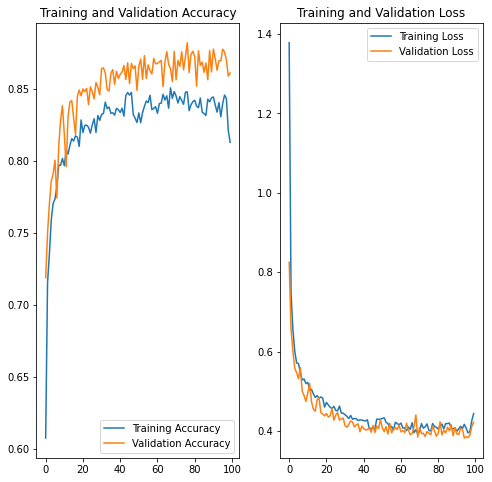

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
import cv2
import math
import os
from glob import glob
from scipy import stats as s

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)

In [ ]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(2048,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(101, activation='softmax'))

In [ ]:
# loading the trained weights
model.load_weights("weights.hdf5")

OSError: ignored

In [ ]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# getting the test list
f = open("/content/drive/Shareddrives/FinalProject/yt_videos/Test-list01.txt", "r")
temp = f.read()
videos = temp.split('\n')
# creating the dataframe
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]
test_videos = test['video_name']
test.head()

,video_name
0,kid_friendly/kf1.mp4
1,kid_friendly/kf2.mp4
2,kid_friendly/kf3.mp4
3,kid_friendly/kf4.mp4
4,kid_friendly/kf5.mp4


In [ ]:
# creating the tags
train = pd.read_csv('/content/drive/Shareddrives/FinalProject/yt_train_new.csv')
y = train['class']
y = pd.get_dummies(y)

In [ ]:
predict = []
actual = []
# for loop to extract frames from each test video
for i in tqdm(range(test_videos.shape[0])):
  count = 0
  videoFile = test_videos[i]
  #pdb.set_trace()
  cap = cv2.VideoCapture('/content/drive/Shareddrives/FinalProject/yt_videos/'+videoFile.split(' ')[0])   # capturing the video from the given path
  frameRate = cap.get(5) #frame rate
  x=1
  # removing all other files from the temp folder
  files = glob('temp/*')
  for f in files:
    os.remove(f)
  while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
      break
    if (frameId % math.floor(frameRate) == 0):
# storing the frames of this particular video in temp folder
      filename ='temp/' + "_frame%d.jpg" % count;count+=1
      cv2.imwrite(filename, frame)
  cap.release()
# reading all the frames from temp folder
images = glob("temp/*.jpg")

100%|██████████| 99/99 [26:27<00:00, 16.04s/it]


In [ ]:
prediction_images = []
for i in range(len(images)):
  img = image.load_img(images[i], target_size=(64,64,3))
  img = image.img_to_array(img)
  img = img/255
  prediction_images.append(img)
# converting all the frames for a test video into numpy array
prediction_images = np.array(prediction_images)
# extracting features using pre-trained model
prediction_images = base_model.predict(prediction_images)
# converting features in one dimensional array
prediction_images = prediction_images.reshape(prediction_images.shape[0], 2*2*512)
# predicting tags for each array
#prediction = model.predict_classes(prediction_images)
prediction = np.argmax(model.predict(prediction_images), axis=0)
# appending the mode of predictions in predict list to assign the tag to the video
predict.append(y.columns.values[s.mode(prediction)[0][0]])
# appending the actual tag of the video
actual.append(videoFile.split('/')[1].split('_')[1])

IndexError: ignored

In [ ]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100